In [1]:
import numpy as np
import pandas as pd

In [2]:
predict = pd.read_json('AggressivenessDetection_predict.json', encoding='utf', orient='columns', lines='True')
df = pd.read_json('AggressivenessDetection_train.json', encoding='utf', orient='columns', lines='True')

print("Predicting Set: " % predict.columns, predict.shape, len(predict))
print("Training Set: " % df.columns, df.shape, len(df))

Predicting Set:  (2196, 3) 2196
Training Set:  (5132, 3) 5132


In [3]:
data = df[['text', 'klass']]
data1 = predict[['text', 'klass']]

In [4]:
from tables.unimplemented import Unknown

data_agresivo = data[data['klass']==1]
data_noagresivo = data[data['klass']==0]
Unknown = -1;
dt = data1[data1['klass']=='unknown']

<AxesSubplot:xlabel='klass', ylabel='count'>

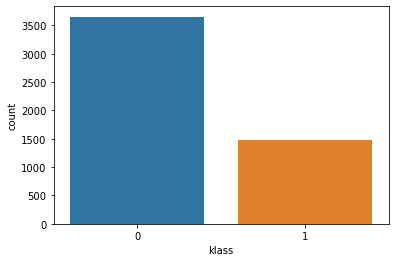

In [5]:
import seaborn as sb

sb.countplot(x='klass', data=df)

In [6]:
print(len(data_agresivo))
print(len(data_noagresivo))

1477
3655


In [7]:
data_agresivo = data_agresivo.iloc[:int(1477)]
data_noagresivo = data_noagresivo.iloc[:int(3655)]

In [8]:
dataset = pd.concat([data_agresivo, data_noagresivo])

In [9]:
import string

spanish_punctuations = string.punctuation
punctuations_list = spanish_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    translator = str.maketrans('áéíóú', 'aeiou')
    translator = str.maketrans('', '', "~!¡@#$%^&*()_+{}|:<>¿?`-=[]\;',./")
    
    return text.translate(translator)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_punctuations(x))
dt['text'] = dt['text'].apply(lambda x: cleaning_punctuations(x))

In [10]:
dataset['text']

0       de verdad que chinguen a su madre todos hoy me...
4       Chingue a su madre pinche profesor de PaolaCac...
6       Sólo a las PUTAS MOCOSAS GORDAS Y feas les gus...
13      USUARIO Emilio Gamboa EPN Manlio Olvídenlo son...
19      Estoy segura que la gorda le quería dar la mor...
                              ...                        
5126    Baja a cenar grito su madre dsde la cocina El ...
5127    Disfrutando de los obsequios de la madre tierr...
5128    Como se azotan por la palabra "verga" peores c...
5129    Para que quiero Spotify si mi vecino todo el d...
5131    Mi tatuaje tiene muchos más significados de lo...
Name: text, Length: 5132, dtype: object

In [11]:
import re

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))', '', data)

dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dt['text'] = dt['text'].apply(lambda x: cleaning_URLs(x))

In [12]:
def cleantxt(text):
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub(r'rt[\s]+', '1', text)
    text = re.sub(r'@[A-Za-z0-9]+', r'1', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'https?:\/\/\S+', r'1', text)
    text = re.sub(r'ñ', 'n', text)
    text = re.sub(r'(.)1+', r'1', text)
    
    print(text)
    
    return text

dataset['text'] = dataset['text'].apply(lambda x: cleantxt(x))
dt['text'] = dt['text'].apply(lambda x: cleantxt(x))

de verdad que chinguen a su madre todos hoy me cae

Chingue a su madre pinche profesor de PaolaCactus

Sólo a las PUTAS MOCOSAS GORDAS Y feas les gusta ese aleman xdxd Si a mi me das un puto perro asco imagínate el URL

USUARIO Emilio Gamboa EPN Manlio Olvídenlo son tantos los hdp q imposible saber cuál fué  😜😜😜

Estoy segura que la gorda le quería dar la mordida a tu pastel 🤣🙊

Todas estan feas menos la que me gusta

Así estas hijo d tu puta madrecuando ganamos la final como Cagan la verga putos

USUARIO Lo que tu no respetas es al país HDP

Seguro era gorda o tenía pintadas las cejas

Diputados HDP traidores a la patria y al pueblo que les paga el sueldo

Deja de comer gorda de mierda si comiste ayer

Y para cuando matan a los HDP que acaban con la vida de tantos mexicanos a diario EsPregunta USUARIO 

PUES QUE PUTO YA LLEGALE A LA VERGA PINCHE CACHAGRANIZO

Pinches culeros si no les importara el qué dirán yo sería muy visto se van a la verga

Por culpa de estos  jo putas voy a hacer

In [13]:
dataset['text'] = dataset['text'].str.lower()
dt['text'] = dt['text'].str.lower()

dataset

,text,klass
0,de verdad que chinguen a su madre todos hoy me...,1
4,chingue a su madre pinche profesor de paolacac...,1
6,sólo a las putas mocosas gordas y feas les gus...,1
13,usuario emilio gamboa epn manlio olvídenlo son...,1
19,estoy segura que la gorda le quería dar la mor...,1
...,...,...
5126,baja a cenar grito su madre dsde la cocina el ...,0
5127,disfrutando de los obsequios de la madre tierr...,0
5128,"como se azotan por la palabra ""verga"" peores c...",0
5129,para que quiero spotify si mi vecino todo el d...,0


In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words

stopword = nltk.corpus.stopwords.words(['english', 'spanish'])

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword or len(word) > 2])

dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dt['text'] = dt['text'].apply(lambda text: cleaning_stopwords(text))

dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esteb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,klass
0,verdad que chinguen madre todos hoy cae,1
4,chingue madre pinche profesor paolacactus,1
6,sólo las putas mocosas gordas feas les gusta e...,1
13,usuario emilio gamboa epn manlio olvídenlo son...,1
19,estoy segura que gorda quería dar mordida past...,1
...,...,...
5126,baja cenar grito madre dsde cocina caminaba x ...,0
5127,disfrutando los obsequios madre tierra emientr...,0
5128,"como azotan por palabra ""verga"" peores cosas l...",0
5129,para que quiero spotify si vecino todo día tie...,0


In [20]:
tweetext = dataset['text']
from nltk.tokenize import word_tokenize
nltk.download('punkt')
tweetext = tweetext.apply(word_tokenize)
dataset['text'] = tweetext
dt['text'] = tweetext

dataset

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esteb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
C:\Users\esteb\AppData\Local\Temp\ipykernel_14540\837085887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['text'] = tweetext


,text,klass
0,"[verdad, que, chinguen, madre, todos, hoy, cae]",1
4,"[chingue, madre, pinche, profesor, paolacactus]",1
6,"[sólo, las, putas, mocosas, gordas, feas, les,...",1
13,"[usuario, emilio, gamboa, epn, manlio, olvíden...",1
19,"[estoy, segura, que, gorda, quería, dar, mordi...",1
...,...,...
5126,"[baja, cenar, grito, madre, dsde, cocina, cami...",0
5127,"[disfrutando, los, obsequios, madre, tierra, e...",0
5128,"[como, azotan, por, palabra, ``, verga, '', pe...",0
5129,"[para, que, quiero, spotify, si, vecino, todo,...",0


In [24]:
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

dataset['text'] = dataset['text'].apply(lambda x: stemming_on_text(x))
dt['text'] = dt['text'].apply(lambda x: stemming_on_text(x))
dataset['text']

C:\Users\esteb\AppData\Local\Temp\ipykernel_14540\3487788931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['text'] = dt['text'].apply(lambda x: stemming_on_text(x))


0           [verdad, que, chinguen, madr, todo, hoy, cae]
4             [chingu, madr, pinch, profesor, paolacactu]
6       [sólo, la, puta, mocosa, gorda, fea, le, gusta...
13      [usuario, emilio, gamboa, epn, manlio, olvíden...
19      [estoy, segura, que, gorda, quería, dar, mordi...
                              ...                        
5126    [baja, cenar, grito, madr, dsde, cocina, camin...
5127    [disfrutando, lo, obsequio, madr, tierra, emie...
5128    [como, azotan, por, palabra, ``, verga, '', pe...
5129    [para, que, quiero, spotifi, si, vecino, todo,...
5131    [tatuaj, tien, mucho, má, significado, lo, que...
Name: text, Length: 5132, dtype: object